In [1]:
from mdagent import MDAgent
import os 

In [2]:
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_7_descriptive = get_prompt("descriptive", 7)
prompt_7_natural = get_prompt("natural", 7)

prompt_7_descriptive, prompt_7_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area).',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute the RMSD, SASA, and radius of gyration of the simulation.')

In [3]:
llm_model = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_7_descriptive)

Thought: First, I need to download the PDB file 1LYZ.
Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Next, I need to report the secondary structure assignments of the downloaded PDB structure.
Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_103244",
    "top_file": "1LYZ_103244",
    "target_frames": "first"
  }
}
```Next, I need to find any known binding or active sites.
Action:
```
{
  "action": "GetBindingSites",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": "P00720"
  }
}
```
The primary accession number provided does not match any entry in the data, using the first entry instead.
Next, I need to simulate for 1ps at 300 K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_103244",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "nonbondedCuto

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [21]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_103244: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_103244
 rec0_103247: dssp values for trajectory with id: 1LYZ_103244
 1LYZ_103307: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_103311: Initial positions for simulation sim0_103311
 sim0_103311: Basic Simulation of Protein 1LYZ_103307
 rec0_103311: Simulation trajectory for protein 1LYZ_103307 and simulation sim0_103311
 rec1_103311: Simulation state log for protein 1LYZ_103307 and simulation sim0_103311
 rec2_103311: Simulation pdb frames for protein 1LYZ_103307 and simulation sim0_103311
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_103323: RMSD plot for 1LYZ
 rgy_rec0_103311: Radii of gyration per frame for rec0_103311
 fig0_103325: Plot of radii of gyration over time for rec0_103311
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_103328: Plot of SASA over time for 1LYZ


In [22]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_103244"))

In [23]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_103244", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [24]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P00720")

The primary accession number provided does not match any entry in the data, using the first entry instead.
The primary accession number provided does not match any entry in the data, using the first entry instead.
The primary accession number provided does not match any entry in the data, using the first entry instead.


"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [25]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_103311")
top_path_1 = registry_1.get_mapped_path("top_sim0_103311")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

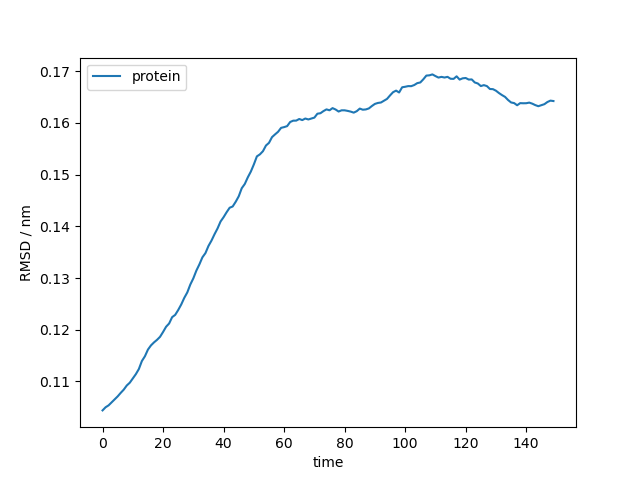

In [26]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_103323'))

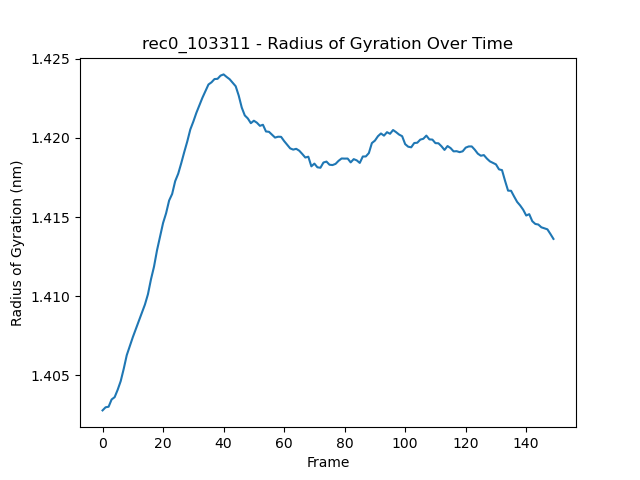

In [27]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_103325'))

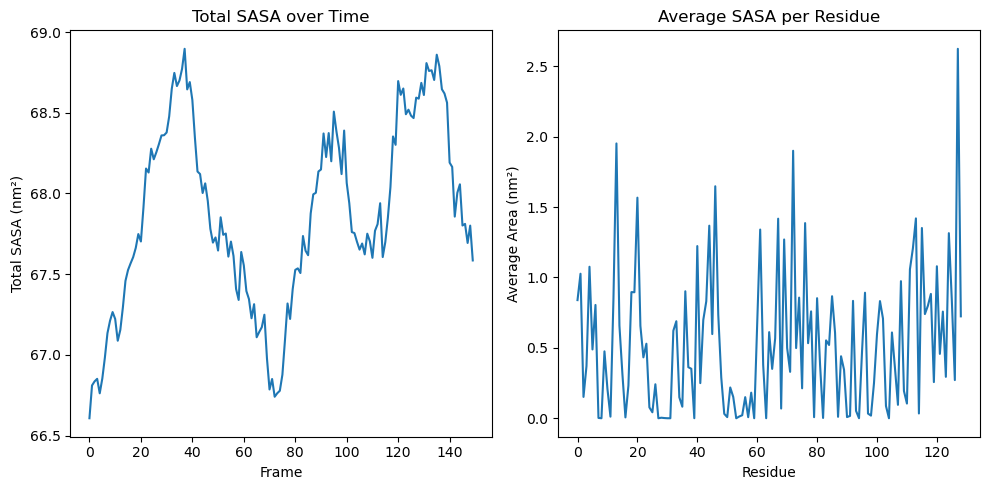

In [28]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_103328'))

In [13]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_7_natural)

Thought: First, I need to download the PDB file for 1LYZ. Then, I can simulate it for 1ps at 300 K and compute the required properties.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Now that I have the PDB file, I can simulate it for 1ps at 300 K and compute the required properties. First, I need to set up and run the simulation.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_103336",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 500000,
      "record_interval_steps": 1000,


({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [14]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_103336: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_103336
 1LYZ_103343: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_103348: Initial positions for simulation sim0_103348
 sim0_103348: Basic Simulation of Protein 1LYZ_103343
 rec0_103348: Simulation trajectory for protein 1LYZ_103343 and simulation sim0_103348
 rec1_103348: Simulation state log for protein 1LYZ_103343 and simulation sim0_103348
 rec2_103348: Simulation pdb frames for protein 1LYZ_103343 and simulation sim0_103348
 rec0_105652: dssp values for trajectory with id: rec2_103348
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_105709: RMSD plot for 1LYZ
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_105717: Plot of SASA over time for 1LYZ
 rgy_rec0_103348: Radii of gyration per frame for rec0_103348
 fig0_105720: Plot of radii of gyration over time for rec0_103348


In [29]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_103336"))

In [16]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="<P00698_or_other>")

In [36]:
from mdagent.tools.base_tools import GetBindingSites

get_binding_sites = GetBindingSites()
get_binding_sites._run(query="1LYZ", primary_accession="")

'[]'

In [37]:
from mdagent.tools.base_tools import GetActiveSites

get_active_sites = GetActiveSites()
get_active_sites._run(query="1LYZ", primary_accession="")

"[{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]"

In [30]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_103348")
top_path_2 = registry_2.get_mapped_path("top_sim0_103348")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

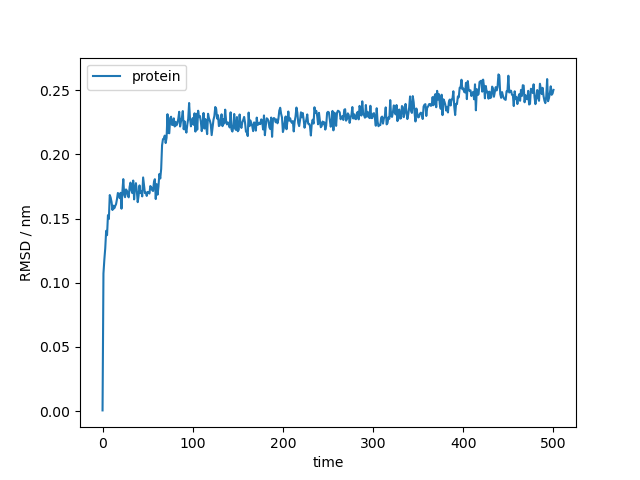

In [31]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_105709'))

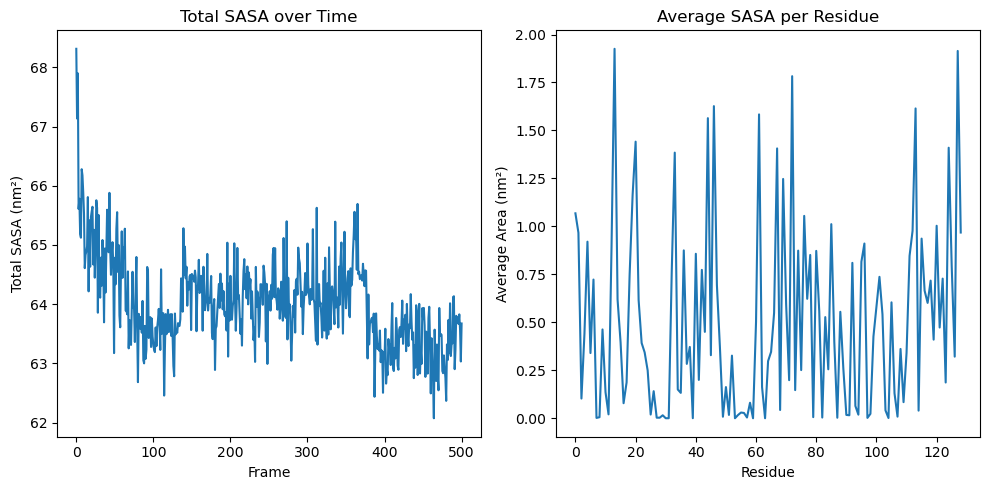

In [32]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_105717'))

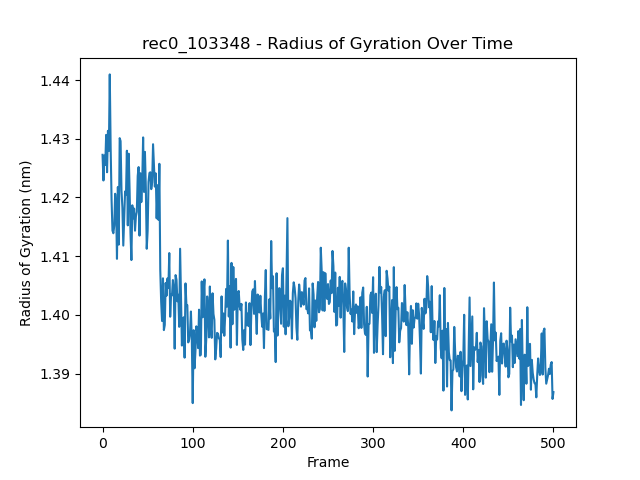

In [33]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_105720'))